In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Point from GP

In [19]:
gpvalues = np.arange(0,1.01, 0.01)
np.random.seed(42)
numtests=10
starts = np.random.randint(1, 10, numtests)
widths = np.random.randint(1,10, numtests)
ends = starts + widths

In [20]:
def point_from_gp_v1(gpvalue, xmin, xmax, warp=False):
    if warp:
        rng = np.log(xmax) - np.log(xmin)
        outvalue = np.exp(np.log(xmin) + gpvalue * rng)
        return np.clip(outvalue, xmin, xmax).astype(int)
    else:
        return int(xmin + (gpvalue * (xmax - xmin)))


In [21]:
def point_from_gp_v2(gpvalue, xmin, xmax, warp=False):
    if warp:
        rng = np.log(xmax+1) - np.log(xmin)
        outvalue = np.exp(np.log(xmin) + gpvalue * rng)
        return np.clip(outvalue, xmin, xmax).astype(int)
    else:
        return int(np.floor(min(xmin + gpvalue * (xmax - xmin + 1), xmax)))


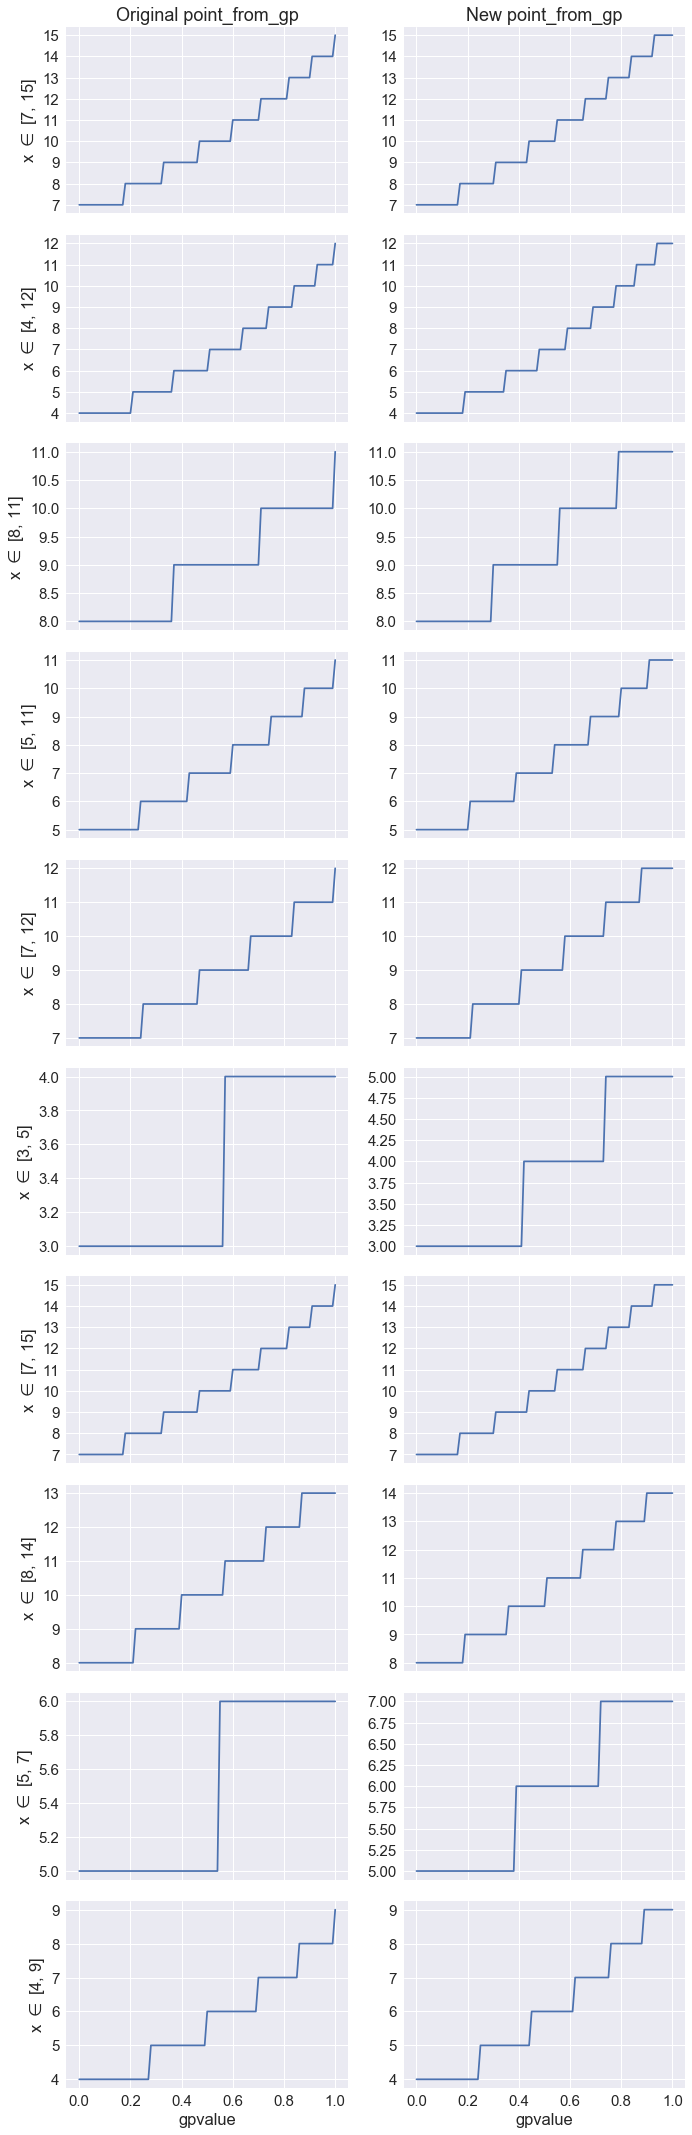

In [22]:
with sns.plotting_context('notebook', font_scale=1.5):
    fig, axes = plt.subplots(numtests, 2, sharex=True, figsize=(10,30))
    for i in range(numtests):
        x = gpvalues
        y1 = [point_from_gp_v1(gpvalue, starts[i], ends[i], warp=True) for gpvalue in gpvalues]
        y2 = [point_from_gp_v2(gpvalue, starts[i], ends[i], warp=True) for gpvalue in gpvalues]

        axes[i,0].plot(x, y1)
        axes[i,1].plot(x, y2)

        axes[i,0].set_ylabel('x $\in$ [{0}, {1}]'.format(starts[i], ends[i]))

    axes[numtests-1, 0].set_xlabel('gpvalue')
    axes[numtests-1, 1].set_xlabel('gpvalue')
    axes[0, 0].set_title('Original point_from_gp')
    axes[0, 1].set_title('New point_from_gp')

    plt.tight_layout()

## Comparison with Random variable strategy

This compares the warped integer variables in the Random strategy  with the original GP strategy (gp1) and suggested change (gp2). It looks at the errors with increaing values sampled. 

In [98]:
xmin, xmax = 1,5
random = []
gp1 = []
gp2 = []
diffs1 = np.empty((100,5))
diffs2 = np.empty((100,5))
bins = np.arange(1,7)
for i in range(100):
    # Random strategy
    random.append([int(np.exp(np.random.uniform(np.log(xmin), np.log(xmax+1)))) for i in range(int(1e4))])
    # GP strategies
    gp2.append([point_from_gp_v2(np.random.uniform(0,1), xmin, xmax, warp=True) for i in range(int(1e4))])
    gp1.append([point_from_gp_v1(np.random.uniform(0,1), xmin, xmax, warp=True) for i in range(int(1e4))])
    
    c, b = np.histogram(np.array(random).flatten(),bins=bins)
    c1, b1 = np.histogram(np.array(gp1).flatten(), bins=bins)
    c2, b2 = np.histogram(np.array(gp2).flatten(), bins=bins)
    diffs2[i] = abs(c-c2)/c
    diffs1[i] = abs(c-c1)/c
    

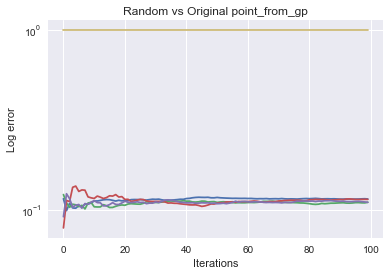

In [101]:
for i in range(5):
    plt.plot(diffs1.T[i])
plt.yscale('log')
plt.ylabel('Log error')
plt.xlabel('Iterations')
plt.title('Random vs Original point_from_gp')

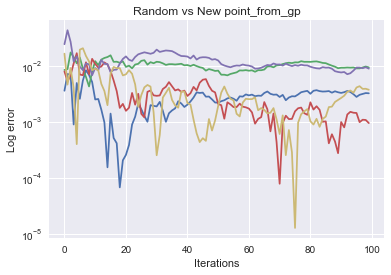

In [102]:
for i in range(5):
    plt.plot(diffs2.T[i])
plt.yscale('log')
plt.ylabel('Log error')
plt.xlabel('Iterations')
plt.title('Random vs New point_from_gp')